<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    21.389693  93.189662  ...  398.129190   634.714269
      1.0    98.292749  49.615176  ...   -2.953645  -737.131681
      2.0    53.155170  47.983001  ...    6.492845   539.796553
      3.0    27.955944  26.213191  ...  -99.219628    35.437579
      4.0    81.042157  78.269938  ...  121.907163 -1553.840563
...                ...        ...  ...         ...          ...
999.0 115.0  62.987188  88.355206  ...  161.242710  -523.549256
      116.0  62.133008  70.524051  ...  132.818015  -141.375667
      117.0  23.358885  33.311270  ...  367.744263   -22.683782
      118.0  43.960608  71.290204  ...  252.262543   780.845215
      119.0  34.685859  30.665491  ...  328.454712  -804.644121

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    21.389693  93.189662  ...  398.129190   634.714269
      1.0    98.292749  49.615176  ...   -2.953645  -737.131681
      2.0    53.155170  47.983001  ...    6.492845   539.796553
      3.0    27.955944  26.213191  ...  -99.219628    35.437579
      4.0    81.042157  78.269938  ...  121.907163 -1553.840563
...                ...        ...  ...         ...          ...
999.0 115.0  62.987188  88.355206  ...  161.242710  -523.549256
      116.0  62.133008  70.524051  ...  132.818015  -141.375667
      117.0  23.358885  33.311270  ...  367.744263   -22.683782
      118.0  43.960608  71.290204  ...  252.262543   780.845215
      119.0  34.685859  30.665491  ...  328.454712  -804.644121

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.389693,93.189662,23.496562,884.767541,1032.843459,398.129190,634.714269
1,0.0,1.0,98.292749,49.615176,93.369343,-991.362594,-740.085326,-2.953645,-737.131681
2,0.0,2.0,53.155170,47.983001,84.828972,350.322254,546.289398,6.492845,539.796553
3,0.0,3.0,27.955944,26.213191,92.218743,-220.169927,-63.782050,-99.219628,35.437579
4,0.0,4.0,81.042157,78.269938,80.106323,-1681.351819,-1431.933401,121.907163,-1553.840563
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,62.987188,88.355206,58.748101,-582.397040,-362.306545,161.242710,-523.549256
119996,999.0,116.0,62.133008,70.524051,36.127899,-187.342610,-8.557652,132.818015,-141.375667
119997,999.0,117.0,23.358885,33.311270,57.991327,220.398998,345.060481,367.744263,-22.683782
119998,999.0,118.0,43.960608,71.290204,61.508693,846.348253,1033.107758,252.262543,780.845215


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    21.389693  93.189662  ...  398.129190   634.714269
      1.0    98.292749  49.615176  ...   -2.953645  -737.131681
      2.0    53.155170  47.983001  ...    6.492845   539.796553
      3.0    27.955944  26.213191  ...  -99.219628    35.437579
      4.0    81.042157  78.269938  ...  121.907163 -1553.840563
...                ...        ...  ...         ...          ...
999.0 115.0  62.987188  88.355206  ...  161.242710  -523.549256
      116.0  62.133008  70.524051  ...  132.818015  -141.375667
      117.0  23.358885  33.311270  ...  367.744263   -22.683782
      118.0  43.960608  71.290204  ...  252.262543   780.845215
      119.0  34.685859  30.665491  ...  328.454712  -804.644121

[120000 rows x 7 columns]

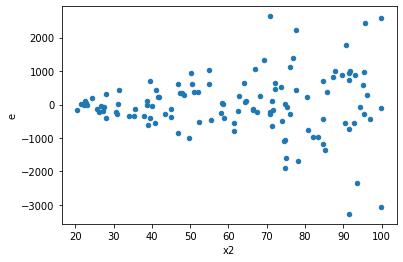

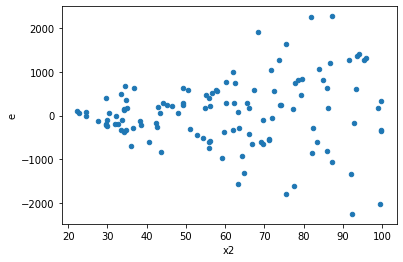

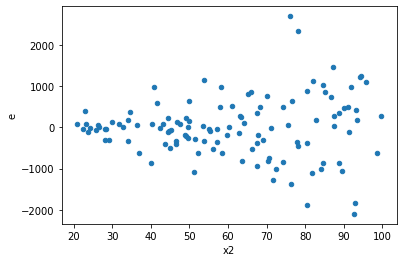

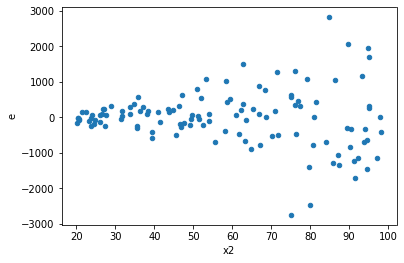

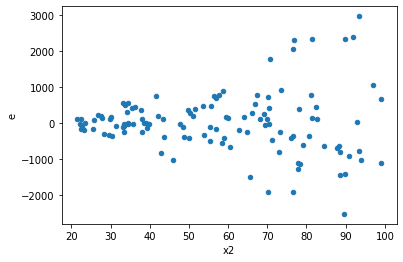

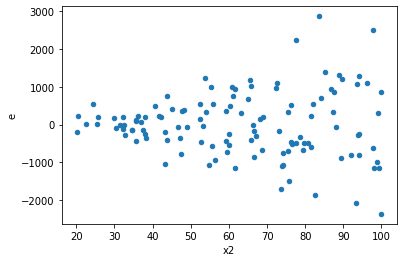

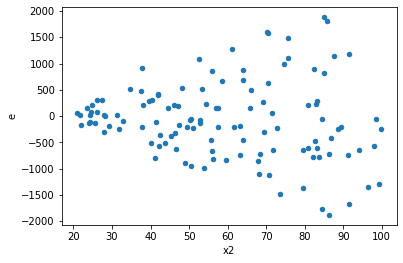

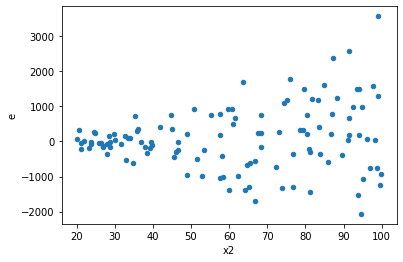

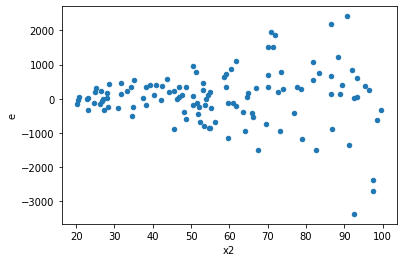

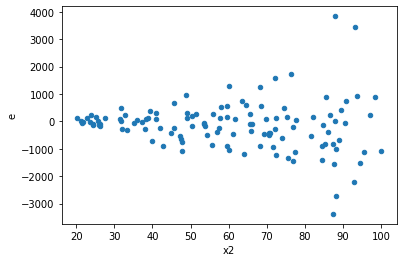

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,74382309.43665227,7774630.366334357,1690507.032651188,176696.1446894172,9.567311361674756,4.955147403506999e-12,0.9999999999975224,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,50797270.28191282,5420041.953249016,1154483.4154980185,123182.77166475035,9.372117544489237,7.241096611210196e-12,0.9999999999963795,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,49188524.68040389,5738932.779102789,1117921.0154637247,130430.2904341543,8.571022971294308,3.679723192817619e-11,0.9999999999816014,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,61494590.09893265,3012954.5714431237,1397604.3204302876,68476.24026007099,20.410062163492366,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,70953912.59540501,4437451.750627826,1612588.922622841,100851.17615063241,15.989787964537578,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,61923357.98345238,9205335.537724394,1407349.0450784632,209212.17131191806,6.726898517678602,2.5566333494708715e-09,0.9999999987216833,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,42285861.46369441,5753508.289920647,961042.3059930548,130761.55204365106,7.349578610631953,5.593521201774365e-10,0.9999999997203239,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,55408756.90642257,6112282.450540994,1259289.929691422,138915.51023956804,9.06514994272203,1.3319567671032928e-11,0.9999999999933402,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,63232536.235257156,4807782.187504305,1437103.0962558445,109267.7769887342,13.152121658007317,1.176836406102666e-14,0.9999999999999941,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,74382309.43665227,7774630.366334357,1690507.032651188,176696.1446894172,9.567311361674756,4.955147403506999e-12,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,50797270.28191282,5420041.953249016,1154483.4154980185,123182.77166475035,9.372117544489237,7.241096611210196e-12,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,49188524.68040389,5738932.779102789,1117921.0154637247,130430.2904341543,8.571022971294308,3.679723192817619e-11,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,61494590.09893265,3012954.5714431237,1397604.3204302876,68476.24026007099,20.410062163492366,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,70953912.59540501,4437451.750627826,1612588.922622841,100851.17615063241,15.989787964537578,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,61923357.98345238,9205335.537724394,1407349.0450784632,209212.17131191806,6.726898517678602,2.5566333494708715e-09,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,42285861.46369441,5753508.289920647,961042.3059930548,130761.55204365106,7.349578610631953,5.593521201774365e-10,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,55408756.90642257,6112282.450540994,1259289.929691422,138915.51023956804,9.06514994272203,1.3319567671032928e-11,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,63232536.235257156,4807782.187504305,1437103.0962558445,109267.7769887342,13.152121658007317,1.176836406102666e-14,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64